# Imports

In [1]:
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr, kendalltau
from scipy.optimize import fsolve
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import math
warnings.filterwarnings('ignore')
sns.set(style="white", palette="muted", color_codes=True)
import chardet

# Dataset Pre-Processing

In [2]:
df_raw = pd.read_csv("AMI_GSE66360_series_matrix.csv", encoding='unicode_escape')

In [3]:
df_raw = df_raw[58:]
header = df_raw.iloc[1]
df_raw.head()


,"!Series_title\t""A Whole Blood Molecular Signature for the Identification of Acute Myocardial Infarction Without Relying Upon Myonecrosis (microarray)""",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
58,Class,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
59,ID_REF,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
60,1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
61,1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
62,117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813


In [4]:
df = pd.DataFrame(df_raw.T.values[1:], columns=df_raw.T.values[0])


In [5]:
df.head()

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.257325,13.266235,14.57123,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
1,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.59386,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
2,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.53997,3.698396
3,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
4,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.50663,2.609707,3.43472,3.577649


# Analysis

## a. High level description 

In [6]:
print(f"1) number of genes: {len(df.columns)-2}")

1) number of genes: 54675


In [7]:
H = 0
M = 0
for subject in df["Class"]:
    if subject == 'H':
        H += 1
    if subject == 'M':
        M += 1
print(f'2) {H+M} total subjects')
print(f'3) {H} healthy subjects, {M} not-healthy subjects')

2) 99 total subjects
3) 50 healthy subjects, 49 not-healthy subjects


In [8]:

df = df.dropna(axis=1)
print(f"4) number of genes after removing rows with missing data: {len(df.columns)-2}")



4) number of genes after removing rows with missing data: 54628


In [9]:
df_genes = df[df.columns[2:]]
df_subjects = df[df.columns[:2]]

In [10]:
df_genes = df_genes.astype('float64')

In [11]:
df = df_subjects.join(df_genes)

In [14]:
df.head()

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,H,GSM1620819,5.866378,8.225790,6.179732,6.179478,2.792048,9.290411,6.998285,5.348944,...,13.257325,13.266235,14.571230,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
1,H,GSM1620820,4.948736,7.525865,6.628137,6.582889,2.695714,9.462275,6.558215,5.410884,...,13.593860,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
2,H,GSM1620821,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.539970,3.698396
3,H,GSM1620822,5.064419,7.198461,5.974135,6.545905,2.712124,9.134584,7.357827,5.242140,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
4,H,GSM1620823,5.017833,7.831450,6.793079,5.911542,2.723687,9.582344,7.283873,5.219484,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.506630,2.609707,3.434720,3.577649


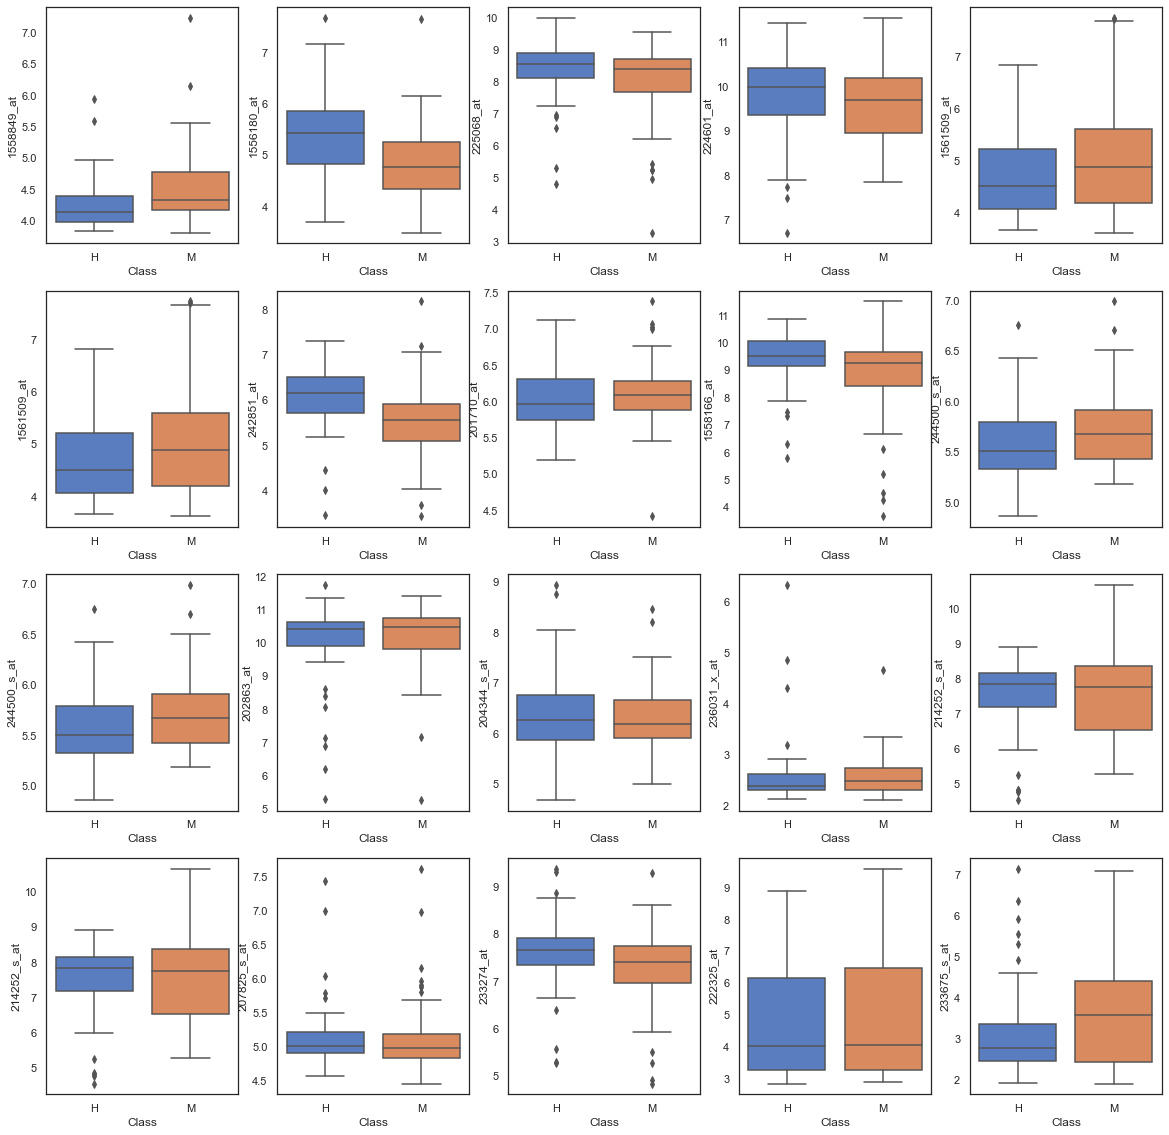

In [15]:
picked_genes = np.random.choice(df.columns[2:],20,replace=False)

fig, ax = plt.subplots(4,5, figsize = (20,20))

for j in range(4):
    for i in range(5):
        sns.boxplot(ax=ax[j,i], x='Class', y=picked_genes[i+4*j], data=df)
        
        

## b. WRS for differential expression

$E(T)=\frac{B(N+1)}{2}$

In [16]:
B = M
N = M+H
E = B*(N+1)/2

print(f"1) The expected ranks' sum for M labeled samples is: {E:,}")

1) The expected ranks' sum for M labeled samples is: 2,450.0


In [17]:
max_RSg = 0
for i in range(B):
    max_RSg += N - i

print(f"2) c = Max RS(g) = {max_RSg:,}")

2) c = Max RS(g) = 3,675


3) To get c, we have only one specific permutation of M and H (the ranks of M are from 99 to 50), which has the probability of $P(RS(g)=c)=\frac{1}{99\choose 49}=1.98\times10^{-29}$

4) The probability of $RS(g)=c-1$ is the same as $P(RS(g)=c)$ since it is also have only one permutation: the ranks from 99 to 51, plus the last one is 50 (minus 1 to the total ranks sum). For c-2 there is 2 options: from the ranks of the maximum sum, replace rank 50 with 48 or replace rank 51 with 49. So, $P(RS(g)=c-2)=\frac{2}{99\choose 49}=3.965\times10^{-29}$

In [18]:
1/math.comb(99,49)

1.9823306042836678e-29

In [19]:
2/math.comb(99,49)

3.9646612085673355e-29

In [20]:
RS = []
status = df['Class']

for i in range(2,len(df.columns)):
    df_values=df[df.columns[i]]
    joined = df_values.sort_values().to_frame().join(status)
    joined.reset_index(drop=True, inplace=True)
    ranks = joined.index[joined['Class']=='M'].tolist()
    ranks_sum = sum(ranks)
    RS.append(ranks_sum)

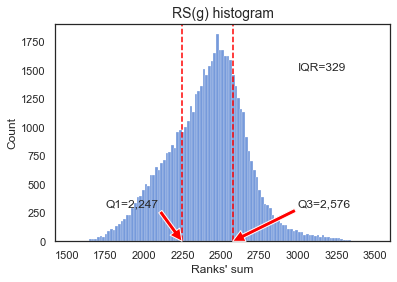

In [21]:
RS = np.array(RS)
IQR = stats.iqr(RS)
Q1, Q3 = np.percentile(RS,[25,75])
sns.histplot(RS)
plt.xlabel("Ranks' sum")
plt.title('RS(g) histogram', fontsize=14)
plt.axvline(Q1 ,c='red',ls='--')
plt.axvline(Q3 ,c='red',ls='--')
plt.text(3000,1500, f'IQR={IQR:.0f}')
plt.annotate(f'Q1={Q1:,.0f}',xy=(Q1,0),xytext=(1750,300),arrowprops=dict(facecolor='red'),size=12)
plt.annotate(f'Q3={Q3:,.0f}',xy=(Q3,0),xytext=(3000,300),arrowprops=dict(facecolor='red'),size=12);


## c. Differential Expression

In [22]:
H_df = df[df['Class']=='H']
M_df = df[df['Class']=='M']

w_over_exp = np.empty((0,2)) # WRS over expressed genes
w_under_exp = np.empty((0,2)) # WRS under expressed genes
t_over_exp = np.empty((0,2)) # t-test over expressed genes
t_under_exp = np.empty((0,2)) # t-test under expressed genes

for i in range(2, len(df.columns)):
    gene = df.columns[i]
    less_wrs = stats.ranksums(x=M_df[gene],y=H_df[gene],alternative='less')[1]
    greater_wrs = stats.ranksums(x=M_df[gene],y=H_df[gene],alternative='greater')[1]
    less_t = stats.ttest_ind(a=M_df[gene],b=H_df[gene],alternative='less')[1]
    greater_t = stats.ttest_ind(a=M_df[gene],b=H_df[gene],alternative='greater')[1]
    if less_wrs <= 0.07:
        w_under_exp = np.append(w_under_exp, np.array([[gene,less_wrs]]), axis=0)
    if greater_wrs <= 0.07:
        w_over_exp = np.append(w_over_exp, np.array([[gene,greater_wrs]]), axis=0)
    if less_t <= 0.07:
        t_under_exp = np.append(t_under_exp, np.array([[gene,less_t]]), axis=0)
    if greater_t <= 0.07:
        t_over_exp = np.append(t_over_exp, np.array([[gene,greater_t]]), axis=0)

print(f"# of overexpressed genes with p-value <= 0.07:\n WRS: {len(w_over_exp)}, t-test: {len(t_over_exp)}")
print(f"# of underexpressed genes with p-value <= 0.07:\n WRS: {len(w_under_exp)}, t-test: {len(t_under_exp)}")
    

# of overexpressed genes with p-value <= 0.07:
 WRS: 10787, t-test: 8517
# of underexpressed genes with p-value <= 0.07:
 WRS: 10667, t-test: 8639


## d. Correlations

In [23]:
df_wrs_over = pd.DataFrame(w_over_exp)
df_wrs_over.iloc[0] = df_wrs_over.iloc[0][1], df_wrs_over.iloc[0][0]
df_wrs_over = df_wrs_over[[1,0]]
df_wrs_under = pd.DataFrame(w_under_exp, columns=[1,0])


In [24]:
t_under_exp = pd.DataFrame(t_under_exp, columns=['gene','p_value'])
t_under_exp

,gene,p_value
0,1316_at,0.0024082850354181754
1,1405_i_at,0.016825223768608337
2,1431_at,5.052319317393478e-05
3,1552277_a_at,0.0019775467051361675
4,1552280_at,0.022217277844840816
...,...,...
8634,65472_at,0.008104055198863425
8635,65585_at,0.00044290294790003
8636,81811_at,0.02051844908197486
8637,91617_at,0.022388989472385004


In [25]:
t_over_exp = pd.DataFrame(t_over_exp, columns=['gene','p_value'])
t_over_exp

,gene,p_value
0,117_at,5.3235161992539446e-05
1,1320_at,0.009004156816677811
2,1552276_a_at,0.014718825524432273
3,1552289_a_at,0.06949757278573329
4,1552293_at,0.018143321319236863
...,...,...
8512,AFFX-M27830_5_at,0.0272496069074238
8513,AFFX-M27830_M_at,0.03571513965908184
8514,AFFX-PheX-3_at,0.059217237597192024
8515,AFFX-r2-Bs-phe-3_at,0.006040084730677762


In [26]:
w_under_exp = pd.DataFrame(w_under_exp, columns=['gene','p_value'])
w_under_exp

,gene,p_value
0,1294_at,0.0465127060267889
1,1316_at,0.0010372343229129914
2,1405_i_at,0.0017592082937371337
3,1431_at,0.00011605431396733688
4,1552277_a_at,0.005425369495645135
...,...,...
10662,78383_at,0.05297549752684468
10663,81811_at,0.0031054906618376704
10664,91617_at,0.014497844189861565
10665,AFFX-HUMISGF3A/M97935_3_at,0.002011192951049774


In [27]:
w_over_exp[0][1], w_over_exp[0][0] = w_over_exp[0][0], w_over_exp[0][1]
w_over_exp = pd.DataFrame(w_over_exp, columns=['gene','p_value'])
w_over_exp.iloc[0] = w_over_exp.iloc[0][1], w_over_exp.iloc[0][0]

w_over_exp

,gene,p_value
0,117_at,8.929379986038556e-06
1,1320_at,0.04583546554456134
2,1552271_at,0.03716081872867343
3,1552276_a_at,0.009348689673408022
4,1552279_a_at,0.0419367815586687
...,...,...
10782,AFFX-ThrX-3_at,0.00900269568598064
10783,AFFX-ThrX-5_at,0.01125870746799257
10784,AFFX-ThrX-M_at,0.013743168055755184
10785,AFFX-TrpnX-3_at,0.0576660896340097


In [28]:
# sorting the WRS

df_wrs_over_sorted = w_over_exp.sort_values(by='p_value',ascending=False)
df_wrs_over_sorted = df_wrs_over_sorted.reset_index()
df_wrs_over_sorted.drop(columns='index',inplace=True)
# df_wrs_over_sorted
df_wrs_under_sorted = w_under_exp.sort_values(by='p_value',ascending=False)
df_wrs_under_sorted = df_wrs_under_sorted.reset_index()
df_wrs_under_sorted.drop(columns='index',inplace=True)
# df_wrs_under_sorted


In [29]:
D = pd.concat([df_wrs_over_sorted.iloc[:80],df_wrs_under_sorted.iloc[:80]],ignore_index=True)


In [30]:
D

,gene,p_value
0,201842_s_at,9.978281746067607e-11
1,236399_at,9.968887833760611e-08
2,211612_s_at,9.968887833760611e-08
3,202499_s_at,9.968887833760611e-08
4,217748_at,9.952161301812519e-09
...,...,...
155,223624_at,8.798860035425218e-05
156,204070_at,8.798860035425218e-05
157,1552787_at,8.798860035425218e-05
158,204407_at,8.798860035425218e-05


In [31]:
df_reduced = df[D['gene']]
df_reduced


,201842_s_at,236399_at,211612_s_at,202499_s_at,217748_at,201340_s_at,201422_at,235146_at,212207_at,1562289_at,...,211984_at,221090_s_at,201013_s_at,243003_at,233852_at,223624_at,204070_at,1552787_at,204407_at,220044_x_at
0,3.502021,5.261079,5.228962,11.041295,9.395946,3.648043,10.404618,6.409570,10.204000,6.414845,...,12.078190,9.924322,9.803422,10.860390,8.036763,7.592295,11.676364,7.609087,7.106207,11.809587
1,3.453371,5.505281,6.166662,10.829943,9.095877,3.385017,10.642567,6.626356,10.313826,7.257731,...,11.735894,9.307371,8.933748,10.172964,7.939606,6.953991,11.708187,8.109399,5.970528,11.678873
2,3.289907,2.833178,3.358337,11.748509,9.644031,4.708786,8.793727,5.105994,10.473720,5.188974,...,12.009081,9.487084,9.140245,10.620788,6.960310,6.465945,11.682134,7.494147,6.656498,11.943521
3,5.059104,3.236647,4.676889,10.939704,8.827271,4.055756,9.569128,5.044178,9.994198,5.069834,...,12.338029,9.528593,9.365117,11.693455,7.412378,7.454736,11.805768,8.194555,6.267339,11.830349
4,2.927988,3.882733,3.933524,11.079016,9.324461,3.407935,9.867284,5.009591,10.234487,5.723907,...,11.769205,9.357888,9.128094,11.051072,7.628206,6.257111,11.829591,7.371525,5.878412,11.776602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,5.069129,6.659102,6.539907,7.512540,8.364556,4.639033,6.157807,5.520073,6.989239,6.818662,...,5.863236,6.831538,5.606823,5.597854,6.058039,5.514976,7.765261,7.728013,6.313012,8.270259
95,5.681953,4.322181,6.923473,10.897436,9.500309,4.146050,9.795268,8.386528,10.786291,8.633666,...,11.632078,6.990783,6.477581,11.087774,4.225631,6.912213,10.798601,7.266904,4.677798,11.548262
96,7.011208,4.089025,5.897127,12.471623,10.062850,3.944813,9.664833,2.793824,10.491927,5.306292,...,11.849599,8.299927,9.861495,9.283622,6.026973,7.624290,10.431686,7.567125,3.771510,11.750561
97,8.251104,4.063803,5.279181,11.159215,9.585197,3.296951,9.456776,4.892357,10.698765,8.237648,...,12.287325,10.039118,9.157406,11.250122,7.564272,8.206249,11.504551,8.481610,7.946670,12.198812


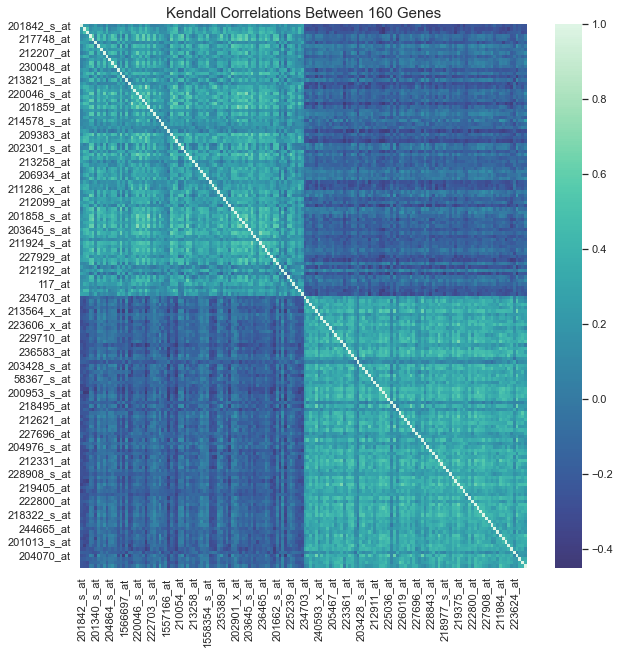

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_reduced.corr(method='kendall'), center=0, cmap='mako')
plt.title('Kendall Correlations Between 160 Genes', fontsize=15);

2) Under the NULL model that the genes are pairwise independent we expect $\tau$ to be zero

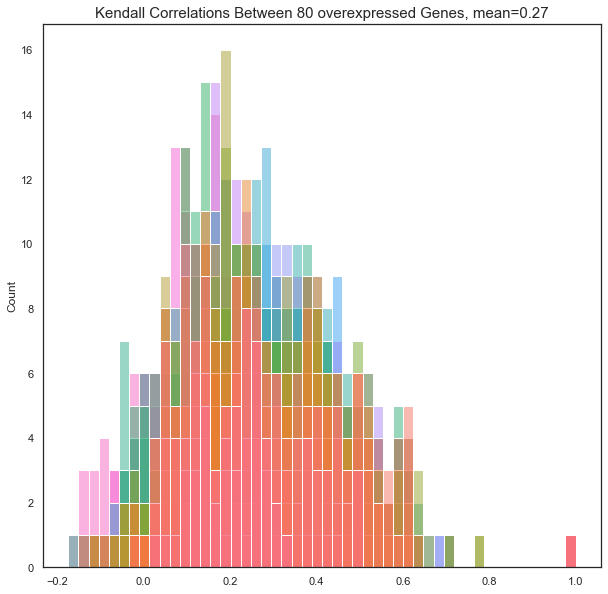

In [33]:
D_over = df[df_wrs_over_sorted.iloc[:80]['gene']]
D_over_corr = D_over.corr(method='kendall')
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(D_over_corr, legend=False)
plt.title(f'Kendall Correlations Between 80 overexpressed Genes, mean={D_over_corr.mean().mean():.2f}', fontsize=15);

In [34]:
print(f"The mean of kendall tau between 160 genes is: {df_reduced.corr(method='kendall').mean().mean():.2f}")
print(f"The mean of kendall tau between 80 overexpressed genes is: {D_over_corr.mean().mean():.2f},")
print("which is larger because the correlations between the over expressed and under expressed cancel each other")
      

The mean of kendall tau between 160 genes is: 0.08
The mean of kendall tau between 80 overexpressed genes is: 0.27,
which is larger because the correlations between the over expressed and under expressed cancel each other


6) The adventage of computing co-expression only for D is that we will get more significant results. If we do it on the entire dataset our overall correlation will be smaller and unsignificant. On the other hand, the entire dataset may be more reliable

## e. Plots and Conclusions of the DE and correlation analysis

### 1)

In [35]:
df_t_over_sorted = t_over_exp.sort_values(by='p_value',ascending=False)
df_t_over_sorted = df_t_over_sorted.reset_index()
df_t_over_sorted.drop(columns='index',inplace=True)


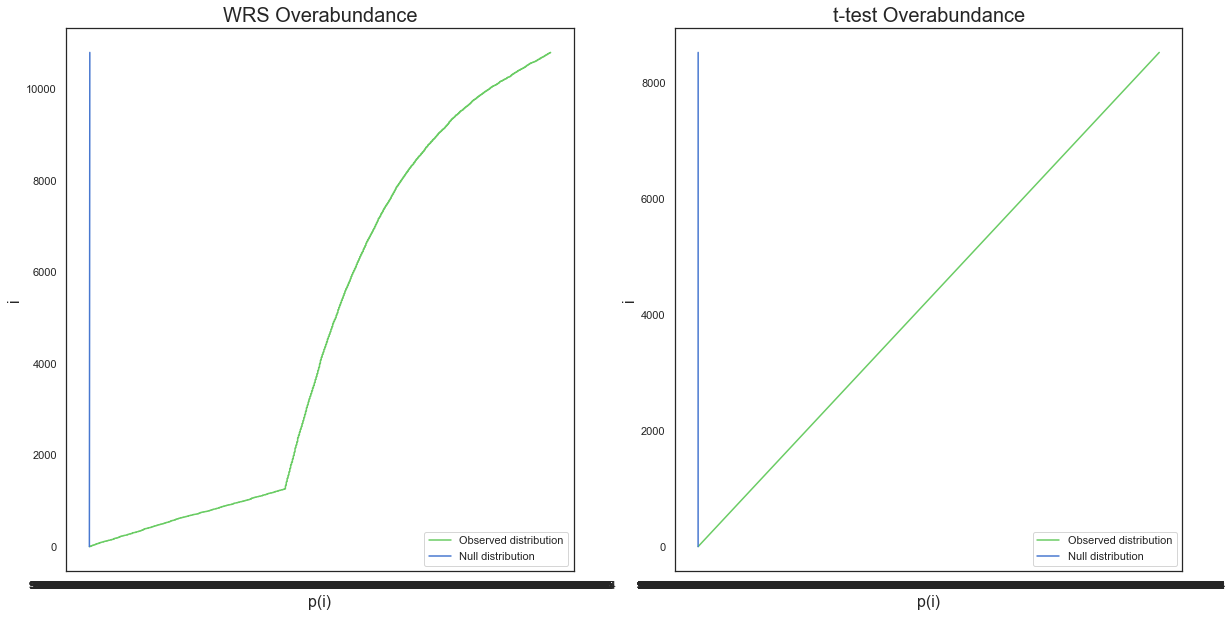

In [36]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
plt.subplot(121)
wrs_null = np.linspace(0,1.0,len(df_wrs_over_sorted['p_value']))
y_wrs = np.arange(len(df_wrs_over_sorted['p_value']))
plt.title('WRS Overabundance', fontsize=20)
plt.xlabel('p(i)', fontsize=16)
plt.ylabel('i', fontsize=16)
plt.plot(df_wrs_over_sorted['p_value'], y_wrs, color='g', label='Observed distribution')
plt.plot(wrs_null, y_wrs, color='b', label='Null distribution')
plt.legend()

plt.subplot(122)
t_null = np.linspace(0,1.0,len(df_t_over_sorted))
y_t = np.arange(len(df_t_over_sorted))
plt.title('t-test Overabundance', fontsize=20)
plt.xlabel('p(i)', fontsize=16)
plt.ylabel('i', fontsize=16)
plt.plot(df_t_over_sorted['p_value'], y_t, color='g', label='Observed distribution')
plt.plot(t_null, y_t, color='b', label='Null distribution')
plt.legend();


In [37]:
# FDR correction function
def FDR(p_vals, threshold):
    '''
    p_vals: sorted list of numeric type p-values (decending order)
    threshold: FDR correction threshold
    return: number of p-values under FDR threshold
    '''
    result = 0
    N = len(p_vals)
    for i in range(1,N):
        p_vals[i] = np.min([p_vals[i-1],p_vals[i]/(N-i)*N])
        if p_vals[i] <= threshold:
            result += 1
    
    return result
    
    

In [38]:
w_over_sorted_pvals = np.flip(np.sort(w_over_exp['p_value'].astype('float64').tolist()))
t_over_sorted_pvals = np.flip(np.sort(t_over_exp['p_value'].astype('float64').tolist()))

print("1) After applying FDR correction on the overexpressed genes I found using WRS and student t-test, I can report:")
print(f"a) tau=0.05: WRS: {FDR(w_over_sorted_pvals,0.05)}, t-test: {FDR(t_over_sorted_pvals,0.05)}")
print(f"b) tau=0.01: WRS: {FDR(w_over_sorted_pvals,0.01)}, t-test: {FDR(t_over_sorted_pvals,0.01)}")
print(f"c) tau=0.005: WRS: {FDR(w_over_sorted_pvals,0.005)}, t-test: {FDR(t_over_sorted_pvals,0.005)}")


1) After applying FDR correction on the overexpressed genes I found using WRS and student t-test, I can report:
a) tau=0.05: WRS: 7576, t-test: 5787
b) tau=0.01: WRS: 1466, t-test: 1290
c) tau=0.005: WRS: 450, t-test: 486


### 2)

In theory, the most extreme p-value effect of a single labeling error, in the overexpression case, will eccure when the highest 'M' expression will be swapped to 'H' or when the lowest 'H' will be swapped to 'M'. Therefore, all the other swapping are not neccessary to check.  

In [39]:
def max_swap_error(name, DF):
    max_pval = 0
    temp = pd.DataFrame(data=[pd.Series(DF['Class']),pd.Series(DF[name])]).T
    temp_with_idx = temp.sort_values(name).reset_index()
    # swap highest M to H
    M_max_idx = temp_with_idx[temp_with_idx['Class']=='M'].iloc[-1]['index']
    temp['Class'].iloc[M_max_idx] = 'H'
    H_temp = temp[temp['Class']=='H']
    M_temp = temp[temp['Class']=='M']
    p_val = stats.ranksums(x=M_temp[name],y=H_temp[name],alternative='greater')[1]
    if p_val > max_pval:
            max_pval = p_val
    # swap back
    temp['Class'].iloc[M_max_idx] = 'M'
    
    # swap lowest H to M
    H_min_idx = temp_with_idx[temp_with_idx['Class']=='H'].iloc[0]['index']
    temp['Class'].iloc[H_min_idx] = 'M'
    H_temp = temp[temp['Class']=='H']
    M_temp = temp[temp['Class']=='M']
    p_val = stats.ranksums(x=M_temp[name],y=H_temp[name],alternative='greater')[1]
    if p_val > max_pval:
            max_pval = p_val
    # swap back
    temp['Class'].iloc[H_min_idx] = 'H'

    return max_pval
        
        

In [40]:
Pu = np.empty((0,2))

for i in range(2, len(df.columns)):
    gene = df.columns[i]
    pval = max_swap_error(gene, df)
    Pu = np.append(Pu, np.array([[gene,pval]]), axis=0)
    
Pu

array([['1007_s_at', '0.9139163819667016'],
       ['1053_at', '0.23112497306277136'],
       ['117_at', '3.953892300139608e-05'],
       ...,
       ['AFFX-TrpnX-3_at', '0.10902247357912948'],
       ['AFFX-TrpnX-5_at', '0.12698441280644662'],
       ['AFFX-TrpnX-M_at', '0.09180477642618978']], dtype='<U32')

In [41]:
Pu_df = pd.DataFrame(data=Pu,columns=['gene','p_value'])
Pu_df

,gene,p_value
0,1007_s_at,0.9139163819667016
1,1053_at,0.23112497306277136
2,117_at,3.953892300139608e-05
3,121_at,0.38173114902663036
4,1255_g_at,0.24200917735239097
...,...,...
54623,AFFX-ThrX-5_at,0.026275265275135528
54624,AFFX-ThrX-M_at,0.03132888587537633
54625,AFFX-TrpnX-3_at,0.10902247357912948
54626,AFFX-TrpnX-5_at,0.12698441280644662


In [42]:
Pu_sorted_pvals = np.flip(np.sort(Pu_df['p_value'].astype('float64').tolist()))

print("After applying FDR correction on the overexpressed genes in Pu, with tau=0.05:")
print(FDR(Pu_sorted_pvals,0.05))


After applying FDR correction on the overexpressed genes in Pu, with tau=0.05:
1847


We can see that the above number is much smaller then the number reported in section 3e1a. We could probably say that the p-value of the genes that wasn't reported this time is very close to the threshold we defined, so they don't pass the more robust threshold

### 3)

In [43]:
sample_D = df[D['gene']].sample(n=3, axis=1).join(df["Class"])

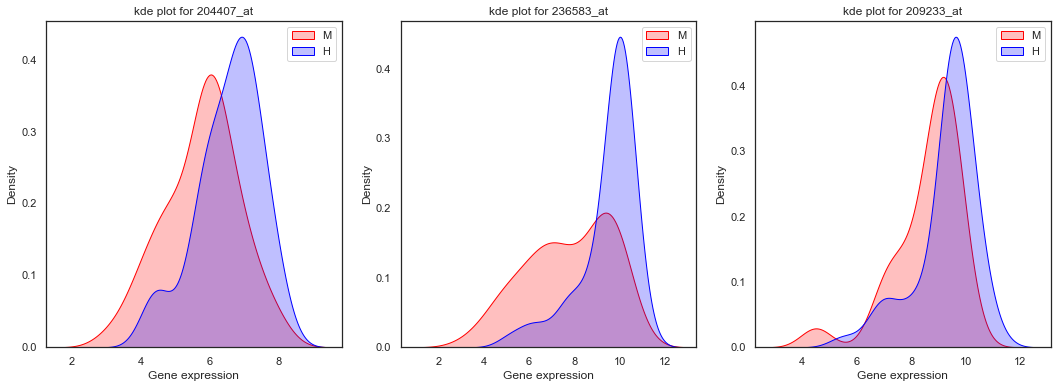

In [44]:
fig,ax = plt.subplots(1,3, figsize=(18,6))

for i in range(1,4):
    plt.subplot(int(f'13{i}'))
    col = sample_D.columns[i-1]
    sns.kdeplot(sample_D[sample_D['Class']=='M'][col], shade=True, label='M', color='red')
    sns.kdeplot(sample_D[sample_D['Class']=='H'][col], shade=True, label='H', color='blue')
    plt.xlabel('Gene expression')
    plt.ylabel('Density')
    plt.title(f'kde plot for {col}')
    plt.legend();
    
    

### 4)

In [45]:
df_D = df[D['gene']].join(df["Class"]).sort_values('Class')

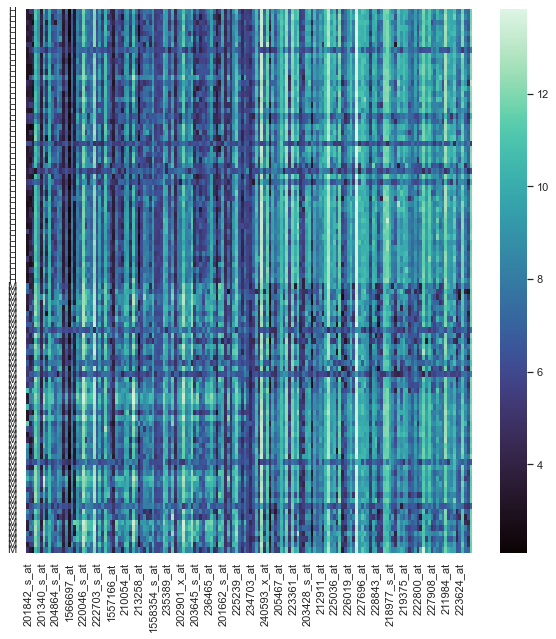

In [46]:
plt.subplots(figsize=(10,10))
sns.heatmap(df_D[df_D.columns[0:-1]], yticklabels=df_D["Class"], cmap='mako');
